# Garch Fund Portfolio Constructor #

### General Approach ###

1. Pull Financial Data for all SP500 companies over past 1 years
    - find necessary libraries
    - list dependencies below
2. Convert to 15 day return series (corresponding with report deadlines)
3. Fit a garch model to each SP500 company
4. Forecast 1 step ahead for each 
5. Take top 15 forecasted returns
6. Arrange GARCH forecasted variances in a matrix
7. Compute correlation matrix from historical returns
8. Convert use above matrix to fill in the GARCH covariances
9. Now that we have a list of projected returns and a matrix of covariances, apply markowitz optimization.
10. Give list of weights from Markowitz to Henry. 

##### Dependencies #####
- numpy
- pandas
- arch 3.0 (https://pypi.python.org/pypi/arch/3.0)
    - has a bunch of it's own dependencies, see above

In [48]:
# required libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import pandas.io.data as web
from arch import arch_model

# notebook stuff
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['savefig.dpi'] = 90

In [53]:
# step 1
st = dt.datetime(2015,1,1)
en = dt.datetime(2016,3,1)

sp500_tickers = ["F"]

for ticker in sp500_tickers:
    data = web.get_data_yahoo('^FTSE', start=st, end=en)
    returns = 100 * data['Adj Close'].pct_change().dropna()
    # figure = returns.plot()
    
am = arch_model(returns) 
res = am.fit(update_freq=1)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 443.498162716
Iteration:      2,   Func. Count:     15,   Neg. LLF: 443.491318339
Iteration:      3,   Func. Count:     23,   Neg. LLF: 443.466844067
Iteration:      4,   Func. Count:     30,   Neg. LLF: 443.291253717
Iteration:      5,   Func. Count:     37,   Neg. LLF: 443.204003388
Iteration:      6,   Func. Count:     44,   Neg. LLF: 443.181488281
Iteration:      7,   Func. Count:     51,   Neg. LLF: 443.164974703
Iteration:      8,   Func. Count:     57,   Neg. LLF: 443.164319139
Iteration:      9,   Func. Count:     63,   Neg. LLF: 443.163963885
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 443.16396328
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Con

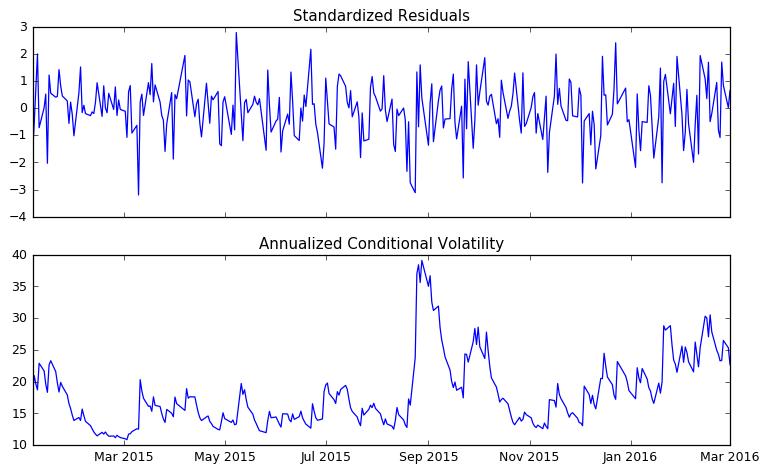

In [51]:
fig = res.plot(annualize='D')